# Лабораторная работа №3: Частотный анализ полиномиальных приближений

Выполнили студентки гр. 1381 Деркачева Дарья, Манцева Татьяна. Вариант №1.

## Цель работы

Провести анализ частотных характеристик известных формул полиномиального сглаживания временных рядов.

## Основные теоретические положения

- Для заданного дискретного сигнала $ x_n $ последовательность, описывающая выходной сигнал нерекурсивного фильтра, в общем случае выглядит следующим образом: 

    $
    y_n = \sum_{k=0}^{M} c_k x_{n-k}
    $
    
    , где $ M $ - размер окна, в котором производится фильтрация.
    
    Для сглаживания полиномом предполагается, что $ y_n = A + Bn + Cn^2 + \cdots$ с необходимым количеством членов. Приближение производится в смысле МНК, поэтому необходимо минимизировать следующую сумму:
    
    $
    F(A, B) = \sum_{k=-m}^{m} (s_k - y_k)^2
    $


- Передаточная функция нерекурсивного фильтра:

    $ 
    H(\omega) = \frac{\sum_{k=0}^{m} c_k e^{i \omega (n-k)}}{e^{i \omega n}} = \sum_{k=0}^{m} c_k e^{-i \omega k}
    $
    
- Связь передаточной функции для круговой частоты и циклической:
    $
    \tilde{H}(f) = H(2\pi f) = H(\omega)
    $


- Формула Дирихле для полиномиального сглаживания:

   Формула, применимая для простых скользящих средних:

  
   $
   \tilde{H}_N(f) = \frac{\sin(N \pi f)}{N \sin(\pi f)}
   $

- Формула Эйлера:

   Для преобразования косинусов в комплексные экспоненты:

  
   $
   \cos(2\pi f) = \frac{e^{i 2\pi f} + e^{-i 2\pi f}}{2}
   $


- Частотные свертки для полиномиального сглаживания:

   При полиномиальной аппроксимации, например, второй степени:

  
   $
   \tilde{H}(f) = 2K \sum_{k=1}^{m} (k^2 - D) \cos(2\pi k f) - DK
   $

  
   , где $ K $ и $ D $ — коэффициенты, зависящие от параметров полинома и длины фильтра.

- Формула Спенсера:

   $
   \tilde{H}_{S}(f) = \sum_{k=-(M-1)/2}^{(M-1)/2} c_k e^{-i 2 \pi f k}
   $
   
   ,где $ c_k $ — коэффициенты фильтра Спенсера определенные заранее для конкретного $ m $.

-  Логарифмическое представление частотных характеристик (в дБ):

   Переход к логарифмической шкале для представления амплитудно-частотной характеристики:

   
   $
   H_{dB}(f) = 20 \cdot \log_{10} |\tilde{H}(f)|
   $

- Круговая и циклическая частоты: $ \omega = 2 \pi f $

- Формулы Спенсера:
    
    Для 15 точек: $ y_n = \frac{1}{320} (-3s_{n-7} - 6s_{n-6} - 5s_{n-5} + 3s_{n-4} + 21s_{n-3} + 46s_{n-2} + 67s_{n-1} + 74s_{n} + 67s_{n+1} + 46s_{n+2} + 21s_{n+3} + 3s_{n+4} - 5s_{n+5} -6 s_{n+6} - 3s_{n+7} ) $

    Для 21 точки: $ y_n = \frac{1}{350} (-1s_{n-10} - 3s_{n-9} - 5s_{n-8} - 5s_{n-7} - 2s_{n-6} + 6s_{n-5} + 18s_{n-4} + 33s_{n-3} + 47s_{n-2} + 57s_{n-1} + 60s_{n} + 57s_{n+1} + ... ) $


  $ \cos(2\pi k f) = \frac{e^{i 2\pi k f} + e^{-i 2\pi k f}}{2} $


## Постановка задачи

Получить формулы для передаточных функций нерекурсивных фильтров, соответствующих полиномиальному сглаживанию дискретного сигнала для полиномов различного порядка и построить графики $\tilde{H}(f)$. Проинтерпретировать частотные свойства передаточных функций. Провести сопоставительный анализ частотных характеристик передаточных функций для различных степеней полиномов. 

## Выполнение работы

In [53]:
import numpy as np
import pandas as pd
from sympy import symbols, solve, diff

import matplotlib.pyplot as plt
import seaborn as sns

### Задание 1.

Вывести формулы для передаточной функции нерекурсивного фильтра, соответствующего сглаживанию прямой линией по 3, 5, 7 и 9 точкам. Построить графики $\tilde{H}(f)$. Проинтерпретировать частотные свойства передаточных функций для различного количества точек.

Выведем формулу для передаточной функции нерекурсивного фильтра, соответствующего сглаживанию прямой линией для общего случая – при сглаживании по 2𝑚 + 1 точке.

Входной сигнал $ s(t) $, выходной сигнал $ y(t) $ имеет вид $ y(t) = A + Bt $. Мы хотим, чтобы выходной сигнал $ y(t) $ минимально отличался от входного сигнала $ s(t) $. Это можно формализовать через минимизацию функции ошибки по методу наименьших квадратов (МНК), поэтому необходимо минимизировать следующую сумму:

$ F(A, B) = \sum_{k=-m}^{m} (s_k - y_k)^2 = \sum_{k=-m}^{m} (s_k - A - Bk)^2 $

Для нахождения оптимальных значений параметров $ A $ и $ B $, нужно приравнять к нулю частные производные функции ошибки:

$ \begin{cases} \frac{ \partial F(A, B) }{ \partial A } = 0 \\
\frac{ \partial F(A, B) }{ \partial B } = 0 \end{cases} $

Получаем следующую систему:

$ \begin{cases} -2 \sum_{k=-m}^{m} (s_k - A - Bk) = 0 \\
-2 \sum_{k=-m}^{m} (ks_k - kA - Bk^2) = 0 \end{cases} $

Из которой можем выразить $ A $ и $ B $:

$ \begin{cases} A = \frac{1}{2m + 1} \sum_{k=-m}^{m} s_k \\
B = \frac{ \sum_{k=-m}^{m} ks_k }{ \sum_{k=-m}^{m} k^2 } \end{cases} $

Значение выходного сигнала $ y_n $ будет:

$ y_n = A = \frac{1}{2m + 1} \sum_{k=n-m}^{n+m} s_k $

если $ s_n = e^{i \omega n} $, то:

$ y_n = \frac{1}{2m + 1} \sum_{k=n-m}^{n+m} e^{i \omega k} $ = $s_n \cdot \frac{1}{2m + 1} \sum_{k=-m}^{m} e^{i \omega k} = H(\omega)s_n$

$ H(\omega) = \frac{1}{2m+1} \sum_{k=-m}^{m} e^{i \omega k} = \frac{1}{2m+1} \cdot \frac{e^{i \omega (-m)} \left(e^{i \omega (2m+1)} - 1 \right)}{e^{i \omega} - 1}  = \frac{1}{2m+1} \cdot \frac{e^{-\frac{i \omega}{2}} \left(e^{i \omega (m+1)} - e^{-i \omega m}\right)}{e^{\frac{i \omega}{2}} - e^{-\frac{i \omega}{2}}} = \frac{1}{2m+1} \cdot \frac{\left(e^{i \omega \left(m+\frac{1}{2}\right)} - e^{-i \omega \left(m+\frac{1}{2}\right)}\right)}{e^{\frac{i \omega}{2}} - e^{-\frac{i \omega}{2}}} = \frac{1}{2m+1} \cdot \frac{\sin \left(\frac{(2m+1) \omega}{2}\right)}{\sin \left(\frac{\omega}{2}\right)}$

Заменим $ \omega = 2\pi f $, тогда:

$ \tilde{H}(f) = H(2\pi f) = \frac{\sin \left((2m+1) \pi f\right)}{(2m+1) \sin (\pi f)} $

Это общая формула передаточной функции нерекурсивного фильтра, соответствующего линейному сглаживанию прямой линией.

Тогда формулы для передаточной функции нерекурсивного фильтра, соответствующего сглаживанию прямой линией по соответсвенным точкам будут выглядеть так:

Сглаживание по 3 точкам: $ \tilde{H_3}(f) = \frac{\sin \left(3 \pi f\right)}{3 \sin (\pi f)}  = \frac{1}{3} (1 + 2\cos(2 \pi f ))$

Сглаживание по 5 точкам: $ \tilde{H_5}(f) = \frac{\sin \left(5 \pi f\right)}{5 \sin (\pi f)} = \frac{1}{5} (1 + 2\cos(2 \pi f ) + 2\cos(4 \pi f))$

Сглаживание по 7 точкам: $ \tilde{H_7}(f) = \frac{\sin \left(7 \pi f\right)}{7 \sin (\pi f)} = \frac{1}{7} (1 + 2\cos(2 \pi f ) + 2\cos(4 \pi f) + 2\cos(6 \pi f))$

Сглаживание по 9 точкам: $ \tilde{H_9}(f) = \frac{\sin \left(9 \pi f\right)}{9 \sin (\pi f)} = \frac{1}{9} (1 + 2\cos(2 \pi f ) + 2\cos(4 \pi f) + 2\cos(6 \pi f) + 2\cos(8 \pi f))$

In [68]:
# вычисляет формулу сглаживания функции по заданной модели и количеству точек, минимизируя ошибку методом наименьших квадратов.
def get_yn(model, params, m):
    m //= 2
    
    indices = range(-m, m+1)
    s = symbols(' '.join([f"s_n{i:+}" for i in indices]))
    
    F = sum((s_k - model.subs(t, k))**2 for k, s_k in zip(indices, s))
    
    equations = [diff(F, param) for param in params]
    solution = solve(equations, params)
    
    yn = model.subs(t, 0).subs(solution).factor()
    
    print(f"Общая формула сглаживания для yn = {model} по {m} точкам:")
    print(yn)

In [67]:
a, b, t = symbols('a b t')
model = a + b*t  # пример полинома
params = (a, b) # параметры полинома
get_yn(model, params, 3)  # количество точек
get_yn(model, params, 5)  # количество точек
get_yn(model, params, 7)  # количество точек
get_yn(model, params, 9)  # количество точек

Общая формула сглаживания для yn = a + b*t по 1 точкам:
(s_n+0 + s_n+1 + s_n-1)/3
Общая формула сглаживания для yn = a + b*t по 2 точкам:
(s_n+0 + s_n+1 + s_n+2 + s_n-1 + s_n-2)/5
Общая формула сглаживания для yn = a + b*t по 3 точкам:
(s_n+0 + s_n+1 + s_n+2 + s_n+3 + s_n-1 + s_n-2 + s_n-3)/7
Общая формула сглаживания для yn = a + b*t по 4 точкам:
(s_n+0 + s_n+1 + s_n+2 + s_n+3 + s_n+4 + s_n-1 + s_n-2 + s_n-3 + s_n-4)/9


In [69]:
# создает передаточную функцию на основе коэффициентов и количества точек
def make_func(coef, m):
    m //= 2
    def transfer_func(f):
        return sum(coef * np.cos(2 * np.pi * f * k) for coef, k in zip(coef, range(-m, m+1)))
    return transfer_func

In [70]:
# строит графики передаточных функций для различных наборов данных
def make_plot(df, who):
    plt.figure(figsize=(10, 6))
    sns.set(style="whitegrid")

    f_values = np.linspace(-0.5, 0.5, 1000)

    for _, row in df.iterrows():
        transfer_func = make_func(row['coef'], row['dots'])
        transfer_values = [transfer_func(f) for f in f_values]
        plt.plot(f_values, transfer_values, label=f'{row["dots"]} точек')

    dots_values = df["dots"]
    dots_values_as_strings = [str(x) for x in dots_values]
    dots_string = ", ".join(dots_values_as_strings)
    
    plt.xlabel('$f$')
    plt.ylabel(r'$\tilde{H}(f)$')
    plt.title(f'Передаточные функции нерекурсивного фильтра, соответствующего сглаживанию {who} по {dots_string} точкам')
    plt.legend()
    plt.tight_layout()


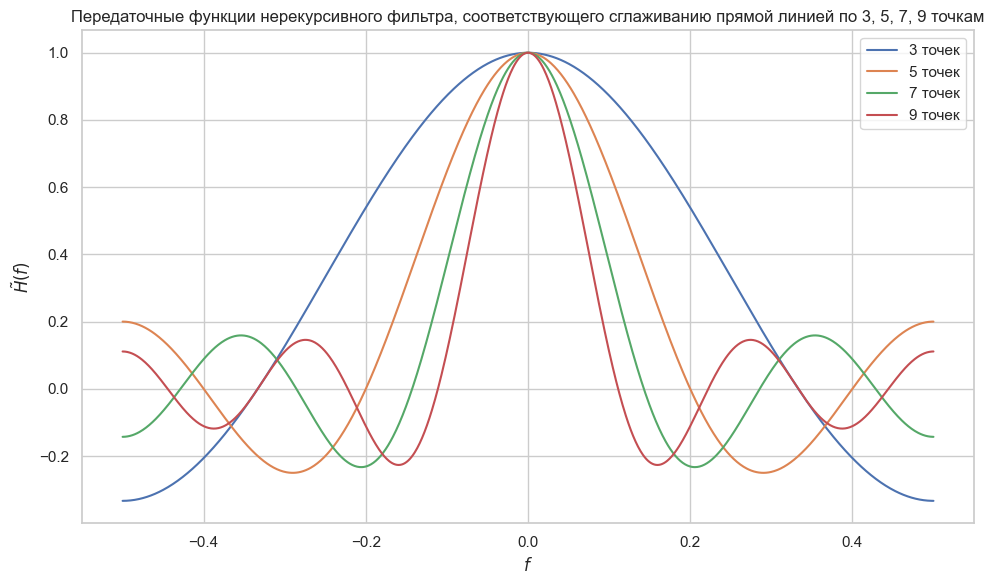

In [41]:
data = {
    'coef': [
        [1/3] * 3,
        [1/5] * 5,
        [1/7] * 7,
        [1/9] * 9
    ],
    'dots': [3, 5, 7, 9]
}

df = pd.DataFrame(data)

make_plot(df,'прямой линией')

Проинтерпретируем частотные свойства передаточных функций для различного количества точек.

1. Угловая Частота:
   - Чем больше количество точек, тем узкополоснее фильтр. Это видно по тому, как функция стремится к нулю с увеличением частоты.

2. Главный Лепесток:
   - Увеличение количества точек приводит к более узкому и высокому главному лепестку. Это означает, что фильтр более точно передает низкие частоты и лучше подавляет высокочастотные шумы.

3. Побочные Лепестки:
   - Фильтры с большим количеством точек имеют более мелкие боковые лепестки, что указывает на лучшее подавление нежелательных частот вне главного диапазона.


Таким образом, увеличение количества точек сглаживания улучшает характеристики фильтра в плане его способности изолировать полезные частоты и подавить нежелательные. 

### Задание 2.

Вывести формулы для передаточной функции нерекурсивного фильтра, соответствующего сглаживанию полиномом второй степени по 7, 9, 11 и 13 точкам. Построить графики $\tilde{H}(f)$. Проинтерпретировать частотные свойства передаточных функций для различного количества точек.

Входной сигнал $ s(t) $, выходной сигнал $ y(t) $ имеет вид $ y(t) = A + Bt + Ct^2 $. Мы хотим, чтобы выходной сигнал $ y(t) $ минимально отличался от входного сигнала $ s(t) $. Это можно формализовать через минимизацию функции ошибки по методу наименьших квадратов (МНК), поэтому необходимо минимизировать следующую сумму:

$ F(A, B) = \sum_{k=-m}^{m} (s_k - y_k)^2 = \sum_{k=-m}^{m} (s_k - A - Bk - Ck^2)^2 $

Для нахождения оптимальных значений параметров $ A $, $ B $ и $ C $, нужно приравнять к нулю частные производные функции ошибки:

$ \begin{cases} \frac{ \partial F(A, B, C) }{ \partial A } = 0 \\
\frac{ \partial F(A, B, C) }{ \partial B } = 0 \\
\frac{ \partial F(A, B, C) }{ \partial B } = 0 \end{cases} $

Получаем следующую систему:

$ \begin{cases} -2 \sum_{k=-m}^{m} (s_k - A - Bk - Ck^2) = 0 \\
-2 \sum_{k=-m}^{m} (ks_k - kA - Bk^2 - Ck^3) = 0 \\
-2 \sum_{k=-m}^{m} (k^2s_k - k^2A - Bk^3 - Ck^4) = 0\end{cases} $

Из которой можем получить $ A $:

$ A = \frac{\sum_{k=-m}^{m} k^2 s_k - \frac{3m^2 + 3m - 1}{5} \sum_{k=-m}^{m} s_k}{\frac{m(m + 1)(2m + 1)}{3} - \frac{(3m^2 + 3m - 1)(2m + 1)}{5}} $

И тогда

$ y_n = \frac{\sum_{k=n-m}^{n+m} \left((k-n)^2 - \frac{3m^2 + 3m - 1}{5}\right) s_k}{\frac{m(m + 1)(2m + 1)}{3} - \frac{(3m^2 + 3m - 1)(2m + 1)}{5}} $

$ s_n = e^{i \omega n} $

По аналогии выведем общую формулу для передаточной функции нерекурсивного фильтра, соответствующего сглаживанию полиномом второй степени:

пусть

$ K = \frac{1}{\frac{m(m + 1)(2m + 1)}{3} - \frac{(3m^2 + 3m - 1)(2m + 1)}{5}}$, $ D = \frac{3m^2 + 3m - 1}{5} $


$ y_n = K \sum_{k=n-m}^{n+m} \left((k-n)^2 - D\right) e^{i \omega k} = s_n \cdot K \sum_{k=-m}^{m} \left(k^2 - D\right) e^{i \omega k} = H(\omega) s_n $

$H(\omega) = K \sum_{k=-m}^{m} \left(k^2 - D\right) e^{i \omega k} = 2K \sum_{k=1}^{m} \left(k^2 - D\right) \cos(\omega k) - DK$ 

$ \tilde{H}(f) = H(2\pi f) = 2K \sum_{k=1}^{m} \left(k^2 - D\right) \cos(2\pi k f) - DK $



Тогда формулы для передаточной функции нерекурсивного фильтра, соответствующего сглаживанию полиномом второй степени по соответсвенным точкам будут выглядеть так:

Сглаживание по 7 точкам: $ \tilde{H_7}(f) = \frac{1}{21} (7 + 12\cos(2 \pi f ) + 6 \cos(4 \pi f) - 4 \cos(6 \pi f)) $

Сглаживание по 9 точкам: $ \tilde{H_9}(f) = \frac{1}{231} (59 + 108\cos(2 \pi f ) + 78 \cos(4 \pi f) + 28 \cos(6 \pi f) - 42 \cos(8 \pi f)) $

Сглаживание по 11 точкам: $ \tilde{H_{11}}(f) = \frac{1}{429} (89 + 168\cos(2 \pi f ) + 138 \cos(4 \pi f) + 88 \cos(6 \pi f) + 18 \cos(8 \pi f) - 72 \cos(10 \pi f)) $

Сглаживание по 13 точкам: $ \tilde{H_{13}}(f) = \frac{1}{143} (25 + 48\cos(2 \pi f ) + 42 \cos(4 \pi f) + 32 \cos(6 \pi f) + 18 \cos(8 \pi f) + 0 \cos(10 \pi f) - 22 \cos(12 \pi f)) $

In [59]:
a, b, t, c = symbols('a b t c')
model = a + b * t + c * t ** 2  # пример полинома
params = (a, b, c) # параметры полинома
get_yn(model, params, 7)  # количество точек
get_yn(model, params, 9)  # количество точек
get_yn(model, params, 11)  # количество точек
get_yn(model, params, 13)  # количество точек

Общая формула сглаживания для yn = a + b*t + c*t**2 по 3 точкам:
(7*s_n+0 + 6*s_n+1 + 3*s_n+2 - 2*s_n+3 + 6*s_n-1 + 3*s_n-2 - 2*s_n-3)/21
Общая формула сглаживания для yn = a + b*t + c*t**2 по 4 точкам:
(59*s_n+0 + 54*s_n+1 + 39*s_n+2 + 14*s_n+3 - 21*s_n+4 + 54*s_n-1 + 39*s_n-2 + 14*s_n-3 - 21*s_n-4)/231
Общая формула сглаживания для yn = a + b*t + c*t**2 по 5 точкам:
(89*s_n+0 + 84*s_n+1 + 69*s_n+2 + 44*s_n+3 + 9*s_n+4 - 36*s_n+5 + 84*s_n-1 + 69*s_n-2 + 44*s_n-3 + 9*s_n-4 - 36*s_n-5)/429
Общая формула сглаживания для yn = a + b*t + c*t**2 по 6 точкам:
(25*s_n+0 + 24*s_n+1 + 21*s_n+2 + 16*s_n+3 + 9*s_n+4 - 11*s_n+6 + 24*s_n-1 + 21*s_n-2 + 16*s_n-3 + 9*s_n-4 - 11*s_n-6)/143


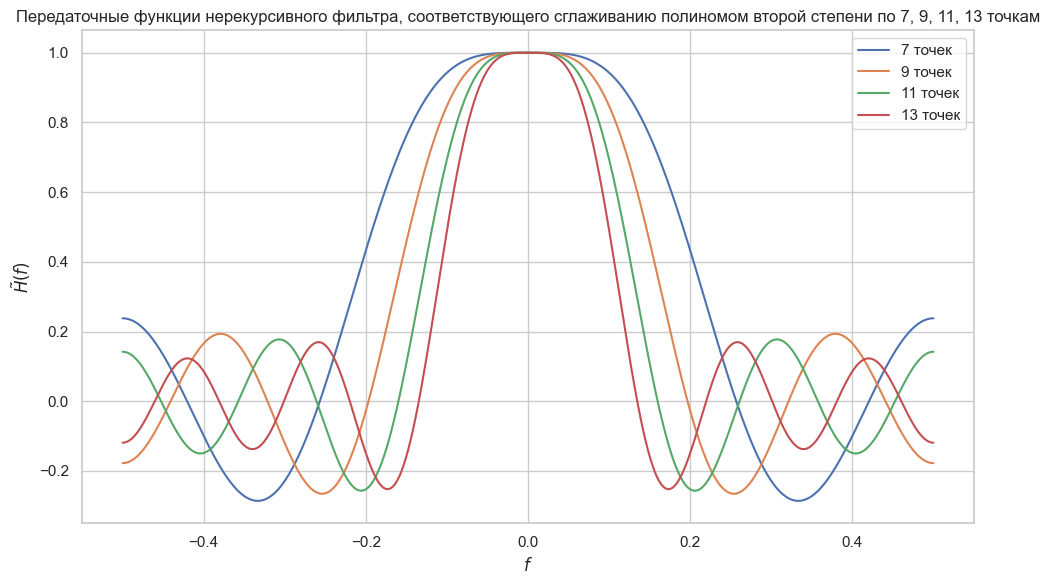

In [42]:
data2 = {
    'coef': [
        [-2/21, 3/21, 6/21, 7/21, 6/21, 3/21, -2/21],
        [-21/231, 14/231, 39/231, 54/231, 59/231, 54/231, 39/231, 14/231, -21/231],
        [-36/429, 9/429, 44/429, 69/429, 84/429, 89/429, 84/429, 69/429, 44/429, 9/429, -36/429],
        [-11/143, 0, 9/143, 16/143, 21/143, 24/143, 25/143, 24/143, 21/143, 16/143, 9/143, 0, -11/143]
    ],
    'dots': [7, 9, 11, 13]
}

df2 = pd.DataFrame(data2)

make_plot(df2,'полиномом второй степени')


Частотные свойства передаточных функций для различного количества точек в этом случае такие же ка ки в пункте выше:

увеличение количества точек сглаживания улучшает характеристики фильтра в плане его способности изолировать полезные частоты и подавить нежелательные.Таким образом, увеличение количества точек сглаживания улучшает характеристики фильтра в плане его способности изолировать полезные частоты и подавить нежелательные. 

### Задание 3.
Вывести формулы для передаточной функции нерекурсивного фильтра, соответствующего сглаживанию полиномом четвёртой степени по 9, 11, 13 и 15 точкам. Построить графики $\tilde{H}(f)$. Проинтерпретировать частотные свойства передаточных функций для различного количества точек.

Входной сигнал $ s(t) $, выходной сигнал $ y(t) $ имеет вид $ y(t) = A + Bt + Ct^2 + Dt^3 + Et^4 $. Мы хотим, чтобы выходной сигнал $ y(t) $ минимально отличался от входного сигнала $ s(t) $. Это можно формализовать через минимизацию функции ошибки по методу наименьших квадратов (МНК), поэтому необходимо минимизировать следующую сумму:

$ F(A, B) = \sum_{k=-m}^{m} (s_k - y_k)^2 = \sum_{k=-m}^{m} (s_k - A - Bk - Ck^2 - Dk^3 - Ek^4)^2 $

Далее по аналогии с предыдущими двумя пунктами: считаем частные производные и приравниваем их к нулю, получаем систему и выражаем A, находим чему равен $ y_n $ и выводим формулу передаточной функции.

В итоге получаем формулы для передаточной функции нерекурсивного фильтра, соответствующего сглаживанию полиномом четвёртой степени по 9, 11, 13 и 15 точкам соответственно.

Сглаживание по 9 точкам: $ \tilde{H_{9}}(f) = \frac{1}{429} (179 + 270\cos(2 \pi f ) + 60 \cos(4 \pi f) - 110 \cos(6 \pi f) + 30 \cos(8 \pi f))$

Сглаживание по 11 точкам: $ \tilde{H_{11}}(f) = \frac{1}{429} (143 + 240\cos(2 \pi f ) + 120 \cos(4 \pi f) - 20 \cos(6 \pi f) - 90 \cos(8 \pi f) + 36 \cos(10 \pi f))$

Сглаживание по 13 точкам: $ \tilde{H_{13}}(f) = \frac{1}{2431} (677 + 1200\cos(2 \pi f ) + 780 \cos(4 \pi f) + 220 \cos(6 \pi f) - 270 \cos(8 \pi f) - 396 \cos(10 \pi f) + 220 \cos(12 \pi f)) $

Сглаживание по 15 точкам: $ \tilde{H_{15}}(f) = \frac{1}{46189} (11063 + 20250\cos(2 \pi f ) + 15000 \cos(4 \pi f) + 7510 \cos(6 \pi f) - 330 \cos(8 \pi f) - 5874 \cos(10 \pi f) - 5720 \cos(12 \pi f) + 4290 \cos(14 \pi f)) $

In [60]:
a, b, t, c, d, e = symbols('a b t c d e')
model = a + b * t + c * t ** 2 + d * t  ** 3 + e * t ** 4  # пример полинома
params = (a, b, c, d, e) # параметры полинома
get_yn(model, params, 9)  # количество точек
get_yn(model, params, 11)  # количество точек
get_yn(model, params, 13)  # количество точек
get_yn(model, params, 15)  # количество точек


Общая формула сглаживания для yn = a + b*t + c*t**2 + d*t**3 + e*t**4 по 4 точкам:
(179*s_n+0 + 135*s_n+1 + 30*s_n+2 - 55*s_n+3 + 15*s_n+4 + 135*s_n-1 + 30*s_n-2 - 55*s_n-3 + 15*s_n-4)/429
Общая формула сглаживания для yn = a + b*t + c*t**2 + d*t**3 + e*t**4 по 5 точкам:
(143*s_n+0 + 120*s_n+1 + 60*s_n+2 - 10*s_n+3 - 45*s_n+4 + 18*s_n+5 + 120*s_n-1 + 60*s_n-2 - 10*s_n-3 - 45*s_n-4 + 18*s_n-5)/429
Общая формула сглаживания для yn = a + b*t + c*t**2 + d*t**3 + e*t**4 по 6 точкам:
(677*s_n+0 + 600*s_n+1 + 390*s_n+2 + 110*s_n+3 - 135*s_n+4 - 198*s_n+5 + 110*s_n+6 + 600*s_n-1 + 390*s_n-2 + 110*s_n-3 - 135*s_n-4 - 198*s_n-5 + 110*s_n-6)/2431
Общая формула сглаживания для yn = a + b*t + c*t**2 + d*t**3 + e*t**4 по 7 точкам:
(11063*s_n+0 + 10125*s_n+1 + 7500*s_n+2 + 3755*s_n+3 - 165*s_n+4 - 2937*s_n+5 - 2860*s_n+6 + 2145*s_n+7 + 10125*s_n-1 + 7500*s_n-2 + 3755*s_n-3 - 165*s_n-4 - 2937*s_n-5 - 2860*s_n-6 + 2145*s_n-7)/46189


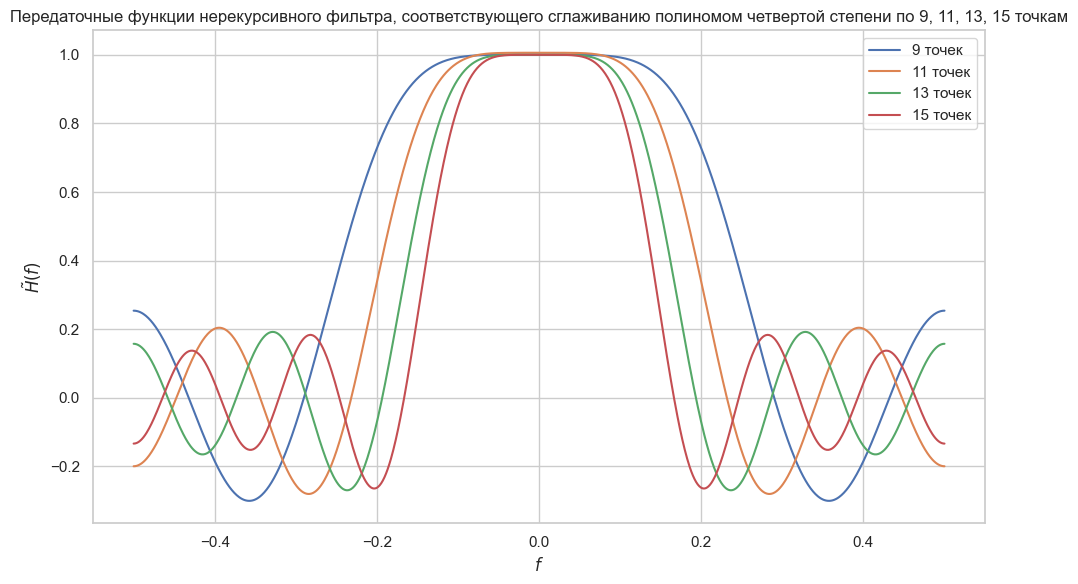

In [63]:
data4 = {
    'coef': [
        [15/429, -55/429, 30/429, 135/429, 179/429, 135/429, 30/429, -55/429, 15/429],
        [18/429, -45/429, -10/429, 60/429, 120/420, 143/429, 120/429, 60/429, -10/429, -45/429, 18/429],
        [110/2431, -198/2431, -135/2431, 110/2431, 390/2431, 600/2431, 677/2431, 600/2431, 390/2431, 110/2431, -135/2431, -198/2431, 110/2431],
        [2145/46189, -2860/46189, -2937/46189, -165/46189, 3755/46189, 7500/46189, 10125/46189, 11063/46189, 10125/46189, 7500/46189, 3755/46189, -165/46189, -2937/46189, -2860/46189, 2145/46189]
    ],
    'dots': [9, 11, 13, 15]
}

df4 = pd.DataFrame(data4)

make_plot(df4,'полиномом четвертой степени')


1. Чем больше точек: Тем более "плавно" и "долговременно" будут сглаженные выходные значения. Это создаст более низкую полосовую частотную характеристику, уменьшая реакцию на высокочастотные компоненты.
2. Частотное сглаживание: С увеличением количества точек фильтр становится более эффективным для удаления высокочастотного шума, но при этом может теряться информация о быстрых изменениях входного сигнала.
3. Полиномиальная аппроксимация высокого порядка: Предоставляет тонкую настройку сглаживания, чем меньше отклонений на низких частотах.


### Задание 4.
Вывести формулы для передаточной функции нерекурсивного фильтра, соответствующего сглаживанию по формулам Спенсера по 15 и 21 точкам. Построить графики $\tilde{H}(f)$. Проинтерпретировать частотные свойства передаточных функций для различного количества точек.

Выпишем формулы Спенсера:

Для 15-ти точек: $ y_n = \frac{1}{320}(-3s_{n-7} - 6s_{n-6} - 5s_{n-5} - 3s_{n-4} + 21s_{n-3} + 46s_{n-2} - 67s_{n-1} + 74s_n + 67s_{n+1} + 46s_{n+2} + 21s_{n+3} + 3s_{n+4} - 5s_{n+5} - 6s_{n+6} - 3s_{n+7}) $

Для 21-й точки: $ y_n = \frac{1}{350}(-s_{n-10} - 3s_{n-6} - 5s_{n-8} - 5s_{n-6} - 2s_{n-5} + 6s_{n-4} + 18s_{n-4} + 33s_{n-3} + 47s_{n-2} + 57s_{n-1} + 60s_n + 57s_{n+1} + 47s_{n+2} + 33s_{n+3} + 18s_{n+4} + 6s_{n+5} - 2s_{n+6} - 5s_{n+7} - 5s_{n+8} - 3s_{n+9} - s_{n+10}) $

Соответствующие передаточные функции:

$ \tilde{H}_{15}(f) = \frac{1}{320}(74 + 134 \cos(2\pi f) + 92 \cos(4\pi f) + 42 \cos(6\pi f) + 6 \cos(8\pi f) - 10 \cos(10\pi f) - 12 \cos(12\pi f) - 6 \cos(14\pi f)) $

$ \tilde{H}_{21}(f) = \frac{1}{350}(60 + 114 \cos(2\pi f) + 94 \cos(4\pi f) + 66 \cos(6\pi f) + 36 \cos(8\pi f) + 12 \cos(10\pi f) - 4 \cos(12\pi f) - 5 \cos(14\pi f) - 10 \cos(16\pi f) - 6 \cos(18\pi f) - 2 \cos(20\pi f)) $

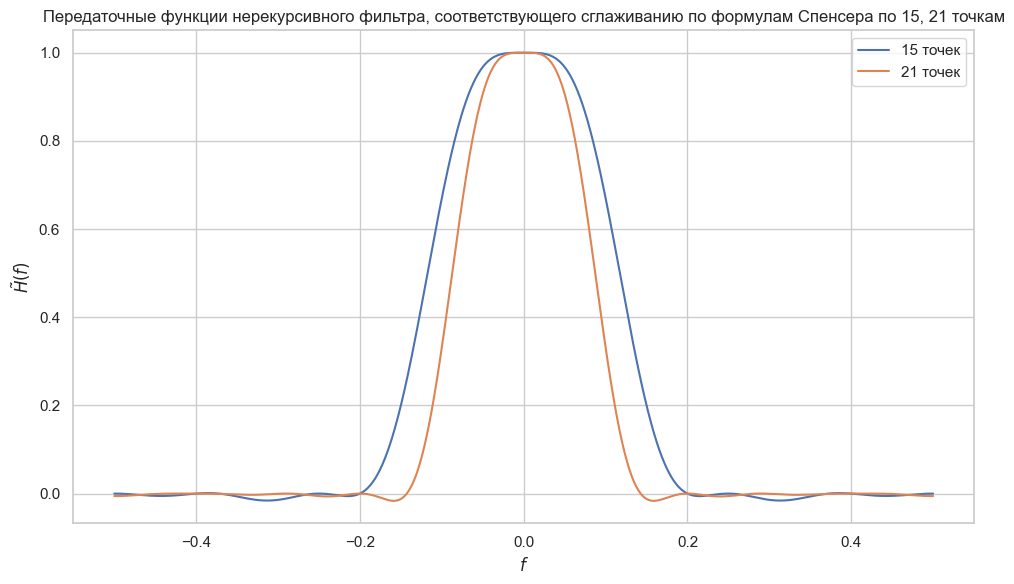

In [62]:
data_sp = {
    'coef': [
        [-3/320, -6/320, -5/320, 3/320, 21/320, 46/320, 67/320, 74/320, 67/320, 46/320, 21/320, 3/320, -5/320, -6/320, -3/320],
        [-1/350, -3/350, -5/350, -5/350, -2/350, 6/350, 18/350, 33/350, 47/350, 57/350, 60/350, 57/350, 47/350, 33/350, 18/350, 6/350, -2/350, -5/350, -5/350, -3/350, -1/350]
    ],
    'dots': [15, 21]
}

df_sp = pd.DataFrame(data_sp)

make_plot(df_sp,'по формулам Спенсера')


- Поведение на низких частотах: Оба фильтра (для 15 и 21 точки) отфильтровывают высокочастотный шум, при этом сохраняя низкочастотные компоненты сигналов.
- Изменение количества точек: Увеличение количества точек (с 15 до 21) делает фильтр более концентрированным на сохранении низкочастотной информации.
- Эффекты сглаживания: Фильтры, использующие большее количество точек, обеспечивают более гладкое сглаживание, что может быть полезно для удаления шума, но может сглаживать и значительные изменения сигнала.

### Задание 5.
Построить графики из предыдущих пунктов в логарифмической шкале (Дб). Объясните, чем отличаются данные графики от полученных ранее и объясните их смысл.

In [71]:
def make_plot_log(df, who):
    plt.figure(figsize=(10, 6))
    sns.set(style="whitegrid")
    
    f_values = np.linspace(-0.5, 0.5, 1000)

    for _, row in df.iterrows():
        transfer_func = make_func(row['coef'], row['dots'])
        transfer_values = [transfer_func(f) for f in f_values]
        
        # Конвертация в дБ
        transfer_values_db = 20 * np.log10(np.abs(transfer_values))
        
        plt.plot(f_values, transfer_values_db, label=f'{row["dots"]} точек')

    dots_values = df["dots"]
    dots_values_as_strings = [str(x) for x in dots_values]
    dots_string = ", ".join(dots_values_as_strings)
    
    plt.xlabel('$f$')
    plt.ylabel(r'$\tilde{H}(f)$ (дБ)')
    plt.title(f'Передаточные функции (в дБ) для {who} по {dots_string} точкам')
    plt.legend()
    plt.tight_layout()
    plt.show()


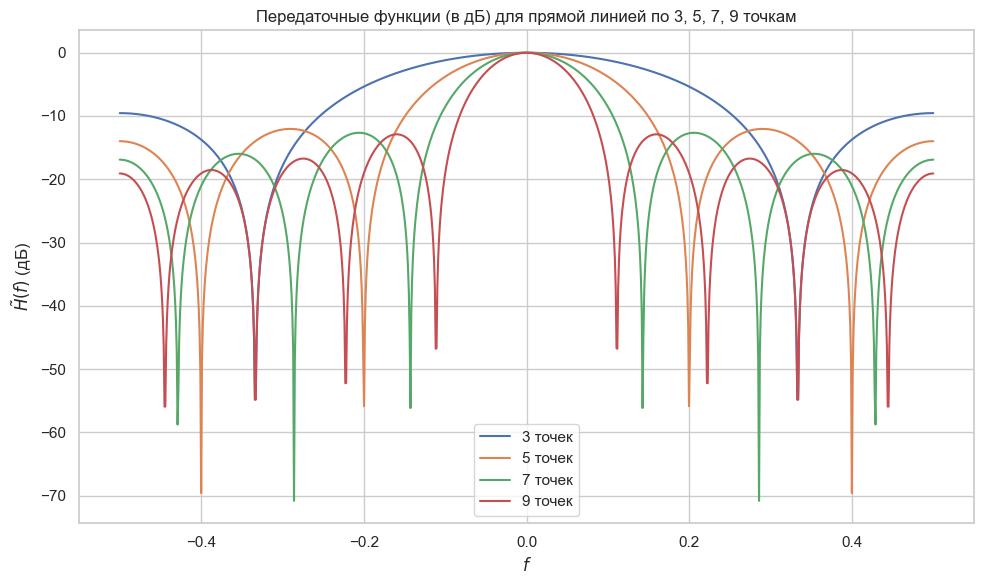

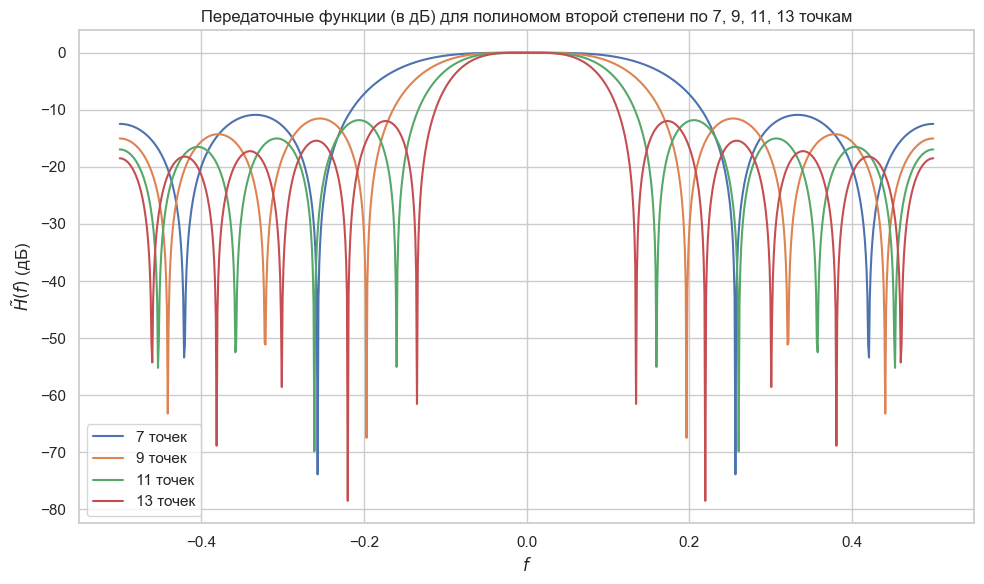

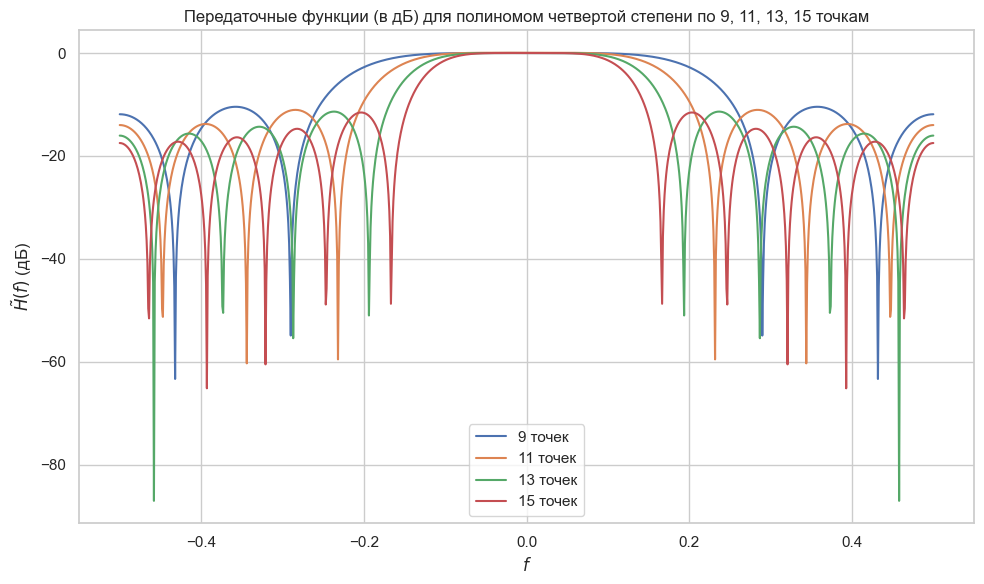

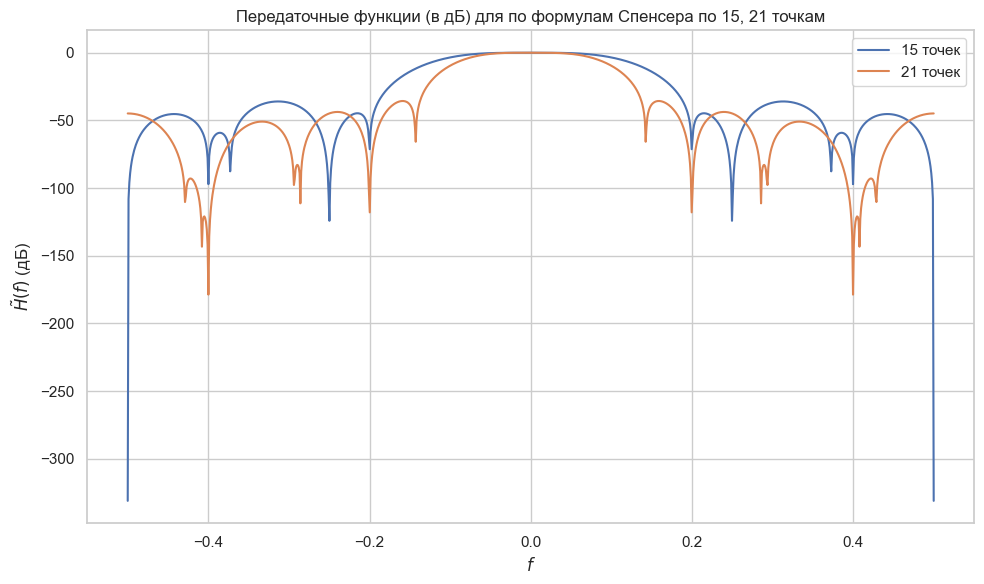

In [65]:
make_plot_log(df,'прямой линией')
make_plot_log(df2,'полиномом второй степени')
make_plot_log(df4,'полиномом четвертой степени')
make_plot_log(df_sp,'по формулам Спенсера')

1. Логарифмическая шкала: Графики в логарифмической шкале показывают соотношение между мощностями сигнала. Они выделяют различия в амплитуде на разных уровнях.

2. Выражение в децибелах: Измерения в дБ позволяют лучше понять, насколько фильтр подавляет или пропускает частоты. Отрицательные значения означают ослабление сигнала.

3. Сравнение с линейными графиками: Логарифмические графики более наглядно показывают изменения в высоких частотах и позволяют идентифицировать частотные полосы затухания и пропускания, которые на линейных шкалах могут быть менее очевидны.


### Задание 6.
Провести сопоставительный анализ свойств передаточных функций, полученных при выполнении п. 1–4.

Увеличение количества точек увеличивает уровень сглаживания, уменьшая реакцию на высокочастотные колебания.

Фильтры с большими окнами лучше сглаживают сигнал, но сужают полосу пропускания, что приводит к потере деталей сигнала.

Фильтры с более высокими степенями полиномов более точно аппроксимируют сложные сигналы, но могут "переглаживать" данные, теряя быстрые изменения.

Сглаживание при помощи формул Спенсера отличается от сглаживания полиномом тем, что передаточная функция после падения до нуля имеет очень низкоамплитудные осцилляции.

## Выводы

В ходе выполнения лабораторной работы были изучены, проанализированны и построены графики передаточных функций нерекурсивных фильтров, соответствующих сглаживанию прямой линией, полиномом второй степени, полиномом четвёртой степени и по формулам Спенсера. Установлено, что увеличение количества точек усиливает низкочастотные компоненты и подавляет высокочастотные шумы. Графики в логарифмической шкале (дБ) позволили более четко различить поведение фильтров по частотам.